#  <center><font color=Green>**ADTA 5340 Section-001**
#  <center><font color=Green>Group 03

# <center><font color=red>Predict the Likelihood of Flight Cancellations or Delays </font> </center>  
## <center><font color=blue> PHASE-1:Business Understanding
 </font> </center> 

Flight cancelations can have economic and social impacts for airlines and passengers. Canceled flights increased from 1.72% in 2021 to 2.69% in 2022 and this is generating a problem for customers that were not able to get to their destinations. Our goal is to generate a model that provides the information to determine if a flight will get canceled or not. With that information, consumers can make better decisions about which flights to book.    

## <center><font color=blue>PHASE-2 Data Understanding and Data Pre-Processing
 </font> </center>

## STEP 1: Import Libraries 
-	import pandas and numpy libraries
-	import scatter_matrix from pandas.plotting
-	import matplotlib.pyplot 
-	import DataFrame, read_csv from pandas

In [51]:
# Importing the libraries which are needed to run the code.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from pandas.plotting import scatter_matrix
from pandas import DataFrame, read_csv



In [2]:
# To print all columns of a dataframe
pd.set_option('display.max_columns', None)

## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
-	Read the description of the dataset listed below
-	Dataset is of Airline delays which had the data from 2022 to 2003. It is called AirlineDelay.csv.
-	Load the data into Pandas dataframe called df
-	View the first five rows of the dataframe
### Description of Airline Delay Dataset
* year : Year data collected 
* month : Numeric representation of the month 
* carrier : Carrier
* carrier_name : Carrier Name 
* airport : Airport code
* airport_name : Name of airport
* arr_flights : Number of flights arriving at airport 
* arr_del15 : Number of flights more than 15 minutes late 
* carrier_ct : Number of flights delayed due to air carrier. (e.g. no crew) 
* weather_ct : Number of flights due to weather. 
* nas_ct : Number of flights delayed due to National Aviation System (e.g. heavy air traffic). 
* security_ct : Number of flights canceled due to a security breach. 
* late_aircraft_ct : Number of flights delayed as a result of another flight on the same aircraft delayed 
* arr_cancelled : Number of cancelled flights 
* arr_diverted : Number of flights that were diverted 
* arr_delay : Total time (minutes) of delayed flight. 
* carrier_delay : Total time (minutes) of delay due to air carrier 
* weather_delay : Total time (minutes) of delay due to inclement weather. 
* nas_delay : Total time (minutes) of delay due to National Aviation System. 
* security_delay : Total time (minutes) of delay as a result of a security issue . 
* late_aircraft_delay : Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late. 

In [3]:
# Load the data set 'AirlineDelay.csv' into a pandas dataframe
# Read the AirlineDelay data set and create the dataframe df


df = pd.read_csv('../Raw_Dataset/Airline_Delay_Cause.csv')
df.shape


(328207, 21)

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 4: Clean the data
-	Find and Mark Missing Values 
-	If there are no missing data points, then proceed to Next Step.

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",86.0,2.0,0.00,0.74,1.26,0.0,0.00,0.0,0.0,54.0,0.0,26.0,28.0,0.0,0.0
1,2022,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",59.0,5.0,1.77,0.00,1.94,0.0,1.29,0.0,0.0,290.0,178.0,0.0,69.0,0.0,43.0
2,2022,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",21.0,1.0,0.01,0.00,0.00,0.0,0.99,0.0,0.0,118.0,1.0,0.0,0.0,0.0,117.0
3,2022,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",98.0,15.0,5.11,0.00,2.69,0.0,7.20,3.0,0.0,1270.0,334.0,0.0,62.0,0.0,874.0
4,2022,11,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1143.0,114.0,28.67,2.26,37.27,0.0,45.80,3.0,1.0,10874.0,5451.0,128.0,1071.0,0.0,4224.0


In [5]:
# Cutting down the number of rows untill 2018 and printing the number of rows and columns
df = df[df['year']>=2018]
df.shape

(95574, 21)

In [6]:
df.columns
# printing column names

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [7]:
# df1 = df.drop(labels = range(95574, 328207), axis = 0)


df1 = df.drop(columns=['year', 'carrier_name', 'airport_name', 'arr_delay', 'carrier_delay', 'weather_delay', 
                 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_del15',  'arr_diverted'])

Here we are dropping the columns related to flight delays as we will be working with the flight cancellations for our project

In [8]:
df1.shape
# printing the number of rows and columns after droping the variables

(95574, 10)

In [9]:
df1.head()
#printing the head variables after dropping columns

,month,carrier,airport,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled
0,11,9E,ABY,86.0,0.00,0.74,1.26,0.0,0.00,0.0
1,11,9E,AEX,59.0,1.77,0.00,1.94,0.0,1.29,0.0
2,11,9E,AGS,21.0,0.01,0.00,0.00,0.0,0.99,0.0
3,11,9E,ALB,98.0,5.11,0.00,2.69,0.0,7.20,3.0
4,11,9E,ATL,1143.0,28.67,2.26,37.27,0.0,45.80,3.0


In [10]:
df1.isnull().sum()
#Checking for the null values

month                 0
carrier               0
airport               0
arr_flights         150
carrier_ct          150
weather_ct          150
nas_ct              150
security_ct         150
late_aircraft_ct    150
arr_cancelled       150
dtype: int64

In [11]:
df1.dropna(how='any', inplace=True)
#dropping the null values from dataset

In [12]:
#Again printing the no of rows of columns to verify whether the null values are dropped 
df1.shape

(95424, 10)

In [13]:
df1.reset_index(drop=True, inplace=True)
# reassigning the index values

In [14]:
# Changing 0.0 to No else Yes

df1['arr_cancelled'] = df1['arr_cancelled'].apply(lambda x: 'No' if x==0.0 else 'Yes')
df1.head()

,month,carrier,airport,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled
0,11,9E,ABY,86.0,0.00,0.74,1.26,0.0,0.00,No
1,11,9E,AEX,59.0,1.77,0.00,1.94,0.0,1.29,No
2,11,9E,AGS,21.0,0.01,0.00,0.00,0.0,0.99,No
3,11,9E,ALB,98.0,5.11,0.00,2.69,0.0,7.20,Yes
4,11,9E,ATL,1143.0,28.67,2.26,37.27,0.0,45.80,Yes


In [15]:
df1['arr_cancelled'].value_counts()
# counting the number of yes and no after replacing

Yes    51334
No     44090
Name: arr_cancelled, dtype: int64

In [16]:
df1.isnull().sum()
#Checking the null values

month               0
carrier             0
airport             0
arr_flights         0
carrier_ct          0
weather_ct          0
nas_ct              0
security_ct         0
late_aircraft_ct    0
arr_cancelled       0
dtype: int64

In [17]:
df1.tail()
#printing the tail values

,month,carrier,airport,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled
95419,1,YX,STL,3.0,0.00,0.00,0.00,0.0,0.00,No
95420,1,YX,SYR,23.0,4.16,0.24,1.63,0.0,1.97,Yes
95421,1,YX,TUL,67.0,0.47,0.41,0.84,0.0,3.28,Yes
95422,1,YX,TVC,25.0,0.54,0.88,1.03,0.0,0.55,No
95423,1,YX,XNA,80.0,2.30,2.19,1.82,0.0,3.69,Yes


## <center><font color=blue>PHASE- 3 EDA
 </font> </center>

We performed EDA in Tableau and showing its graphs in ppt

## <center><font color=blue>PHASE-4 MODELING AND EVALUATION
 </font> </center>

# Encoding
Using statistical methods to identify patterns and trends in airline cancellations, and to create predictive models that can be used to make informed decisions.
- Encoding categorical variables in a pandas dataframe using 'LabelEncoder' class.
- Perform one-hot encoding on the 'carrier' column of the DataFrame df1 using 'OneHotEncoder' class.
- Creating a list of columns to label one-hot encoded columns.
- Concatenating one-hot encoded 'carrier' column with the original DataFrame. 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# encode categorical variables
# Using Label encoding for month 
le = LabelEncoder()
df1['month'] = le.fit_transform(df1['month'])
df1['airport'] = le.fit_transform(df1['airport'])

df1.head()

,month,carrier,airport,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled
0,10,9E,4,86.0,0.00,0.74,1.26,0.0,0.00,No
1,10,9E,11,59.0,1.77,0.00,1.94,0.0,1.29,No
2,10,9E,12,21.0,0.01,0.00,0.00,0.0,0.99,No
3,10,9E,14,98.0,5.11,0.00,2.69,0.0,7.20,Yes
4,10,9E,23,1143.0,28.67,2.26,37.27,0.0,45.80,Yes


In [23]:
# Using OneHotEncoding 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
airport_encoded = ohe.fit_transform(df1[['carrier']])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
ohe_columns = ['carrier_'+ carrier_value for carrier_value in list(df1['carrier'].unique()) ] 

In [25]:
df1 = pd.concat([df1.drop(['carrier', 'airport'], axis=1), 
                 pd.DataFrame(airport_encoded, columns=ohe_columns)], axis=1)


In [26]:
df1.head()

,month,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_G4,carrier_HA,carrier_MQ,carrier_NK,carrier_OH,carrier_OO,carrier_QX,carrier_UA,carrier_WN,carrier_YV,carrier_YX,carrier_EV,carrier_VX
0,10,86.0,0.00,0.74,1.26,0.0,0.00,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,59.0,1.77,0.00,1.94,0.0,1.29,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,21.0,0.01,0.00,0.00,0.0,0.99,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,98.0,5.11,0.00,2.69,0.0,7.20,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,1143.0,28.67,2.26,37.27,0.0,45.80,Yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df1.tail()

,month,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_G4,carrier_HA,carrier_MQ,carrier_NK,carrier_OH,carrier_OO,carrier_QX,carrier_UA,carrier_WN,carrier_YV,carrier_YX,carrier_EV,carrier_VX
95419,0,3.0,0.00,0.00,0.00,0.0,0.00,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95420,0,23.0,4.16,0.24,1.63,0.0,1.97,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95421,0,67.0,0.47,0.41,0.84,0.0,3.28,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95422,0,25.0,0.54,0.88,1.03,0.0,0.55,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95423,0,80.0,2.30,2.19,1.82,0.0,3.69,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# train_test_split
- Split the dataset into training at 70% and test at 30% with randon_state parameter set to 42.

In [28]:
# split the dataset
from sklearn.model_selection import train_test_split

X = df1.drop(['arr_cancelled'], axis=1)  # input features
y = df1['arr_cancelled']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(66796, 26) (28628, 26)
(66796,) (28628,)


# Scaling
- Scaling the numerical features of the input data using the 'StandardScaler' class from scikit-learn.

In [32]:
#  normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_columns = ['month', 'arr_flights', 'carrier_ct', 'nas_ct', 'late_aircraft_ct', 'security_ct', 'weather_ct',
 'carrier_9E', 'carrier_AA', 'carrier_AS', 'carrier_B6', 'carrier_DL', 'carrier_F9', 'carrier_G4', 'carrier_HA', 
 'carrier_MQ', 'carrier_NK', 'carrier_OH', 'carrier_OO', 'carrier_QX', 'carrier_UA', 'carrier_WN', 'carrier_YV', 
 'carrier_YX', 'carrier_EV', 'carrier_VX']

X_train[X_columns]  = scaler.fit_transform(X_train[X_columns])
X_test[X_columns] = scaler.transform(X_test[X_columns])


# Modelling & Evaluation

## RandomForest
- Creating a random forest classifier model and fitting it to the training data.
- Training random forest classifier model to make predictions on the test data.
- Calculating the accuracy score of the random forest classifier model on the test data.

In [52]:
# train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# make predictions on the testing data
y_pred = model.predict(X_test)

In [54]:
# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7517116110101998


In [56]:
c_matrix =  confusion_matrix(y_test, y_pred)
print(c_matrix)

[[ 9724  3512]
 [ 3596 11796]]


<Axes: >

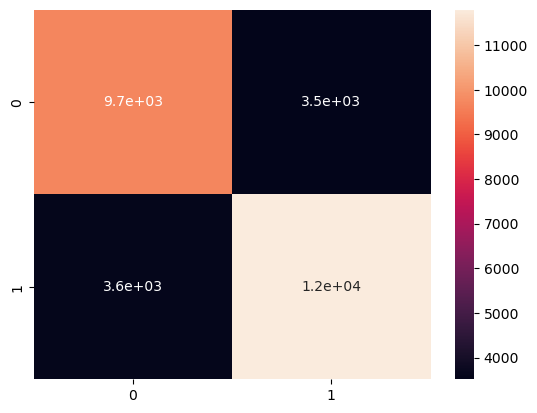

In [57]:
sns.heatmap(c_matrix, annot=True )

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.73      0.73      0.73     13236
         Yes       0.77      0.77      0.77     15392

    accuracy                           0.75     28628
   macro avg       0.75      0.75      0.75     28628
weighted avg       0.75      0.75      0.75     28628



## Logistic Regression
- Importing LogisticRegression from sklearn.linear_model.
- Creating a logistic regression model, fitting it to the training data, and using it to make predictions on the test data, and evaluating its accuracy.

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Create a logistic regression model
log_reg = LogisticRegression()
# Fit the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Use the trained model to make predictions on the test data
y_pred = log_reg.predict(X_test)

In [63]:
# Evaluate the model's accuracy
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7203437194355177


In [64]:
c_matrix =  confusion_matrix(y_test, y_pred)
print(c_matrix)

[[ 9870  3366]
 [ 4640 10752]]


<Axes: >

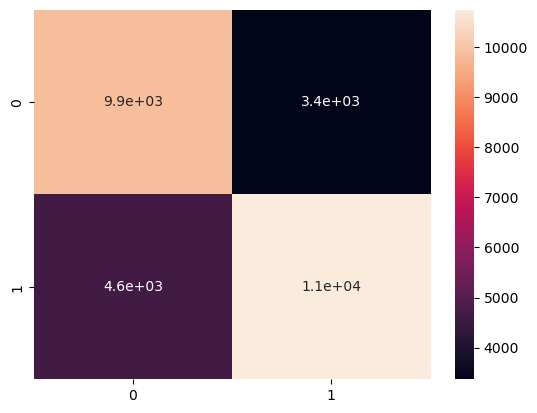

In [65]:
sns.heatmap(c_matrix, annot=True )

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.68      0.75      0.71     13236
         Yes       0.76      0.70      0.73     15392

    accuracy                           0.72     28628
   macro avg       0.72      0.72      0.72     28628
weighted avg       0.72      0.72      0.72     28628



## SVM
- Importing svm from sklearn.
-  Training an svm classifier on the training data, using it to predict the labels of the test data, and printing the accuracy of the classifier.

In [69]:
from sklearn import svm

In [70]:
# Create SVM classifier object
clf = svm.SVC(kernel='linear') 
# Train the SVM classifier using the training data
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

In [72]:
# Print the accuracy of the SVM classifier
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.7215662987285175


In [73]:
c_matrix =  confusion_matrix(y_test, y_pred)
print(c_matrix)

[[10570  2666]
 [ 5305 10087]]


<Axes: >

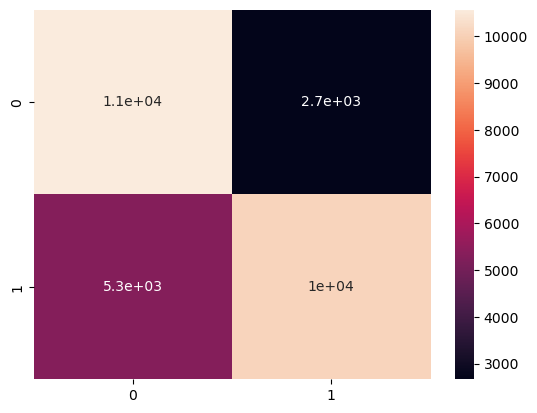

In [74]:
sns.heatmap(c_matrix, annot=True )

## GaussianNB
- Importing GaussianNB from sklearn.naive_bayes.
- Training a Gaussian Naive Bayes classifier on the training data, using it to predict the labels of the test data, and printing the accuracy of the classifier.

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.67      0.80      0.73     13236
         Yes       0.79      0.66      0.72     15392

    accuracy                           0.72     28628
   macro avg       0.73      0.73      0.72     28628
weighted avg       0.73      0.72      0.72     28628



In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()
# Fit the model on the training data
nb.fit(X_train, y_train)

GaussianNB()

In [78]:
# Predict the labels for the test data
y_pred = nb.predict(X_test)

In [79]:
# Evaluate the accuracy of the model
accuracy = nb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6024172139164454


In [80]:
c_matrix =  confusion_matrix(y_test, y_pred)
print(c_matrix)

[[12513   723]
 [10659  4733]]


<Axes: >

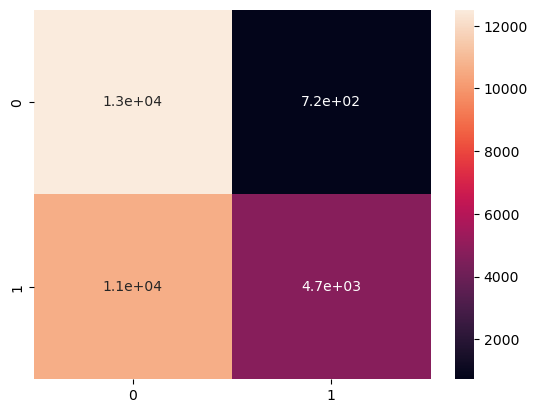

In [81]:
sns.heatmap(c_matrix, annot=True )

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.54      0.95      0.69     13236
         Yes       0.87      0.31      0.45     15392

    accuracy                           0.60     28628
   macro avg       0.70      0.63      0.57     28628
weighted avg       0.72      0.60      0.56     28628

